In [1]:
#1. Giới thiệu một số ứng dụng của tích vector (dot product)
import numpy as np
signals = np.array([[1,2],[3,4],[10,0]])
sample = np.array([3,-1])
np.inner(signals, sample) #(inner = tich vo huong)

array([ 1,  5, 30])

In [2]:
# 1.1.Ứng dụng 1 – Nguyên lý tìm nốt nhạc trong chuỗi âm thanh (Audio search)
A = np.array([0,0,-1,2,3,-1,0,1,-1,-1])
search_vector = np.array([0,1,-1])
len(A), len(search_vector) # nghĩa là = (10, 3)

(10, 3)

In [4]:
B = np.array([1])
B = np.resize(B, (len(A)-len(search_vector)+1, len(search_vector)))
B = np.asmatrix(B)
for i in range(len(A)-len(search_vector)+1):
    for j in range(len(search_vector)):
        B[i,j] = A[i+j]
        print(B[i,j])

0
0
-1
0
-1
2
-1
2
3
2
3
-1
3
-1
0
-1
0
1
0
1
-1
1
-1
-1


In [6]:
C = np.inner(B, search_vector)
for i in range(len(A)-len(search_vector)+1):
    if (C[0,i] == np.inner(search_vector, search_vector)):
        print (i, B[i])

6 [[ 0  1 -1]]


In [14]:
# 1.2.Ứng dụng 2 – Tạo ảnh mẫu và làm mờ ảnh
from PIL import Image
img = Image.open('D:/traidat.PNG')
img.height
img.width
img.mode
img = img.convert("RGB")
new_width = int(img.width / 2)
new_height = int(img.height / 2)
new_img = img.resize((new_width, new_height),Image.ANTIALIAS)
new_img.save('D:/traidat_small.PNG')
new_img.show()

C:\Users\US\AppData\Local\Temp\ipykernel_11660\904605418.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img = img.resize((new_width, new_height),Image.ANTIALIAS)


In [15]:
from PIL import Image, ImageDraw
input_image = Image.open('D:/traidat.PNG')
input_pixels = input_image.load()
box_kernel = [[1 / 9, 1 / 9, 1 / 9],[1 / 9, 1 / 9, 1 / 9],[1 / 9, 1 / 9, 1 / 9]]
kernel = box_kernel
offset = len(kernel) // 2
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)
for x in range(offset, input_image.width - offset):
    for y in range(offset, input_image.height - offset):
        acc = [0, 0, 0]
        for a in range(len(kernel)):
            for b in range(len(kernel)):
                xn = x + a - offset
                yn = y + b - offset
                pixel = input_pixels[xn, yn]
                acc[0] += pixel[0] * kernel[a][b]
                acc[1] += pixel[1] * kernel[a][b]
                acc[2] += pixel[2] * kernel[a][b]
        draw.point((x, y), (int(acc[0]), int(acc[1]), int(acc[2])))
output_image.save('D:/traidat_lammo.PNG')
output_image.show()

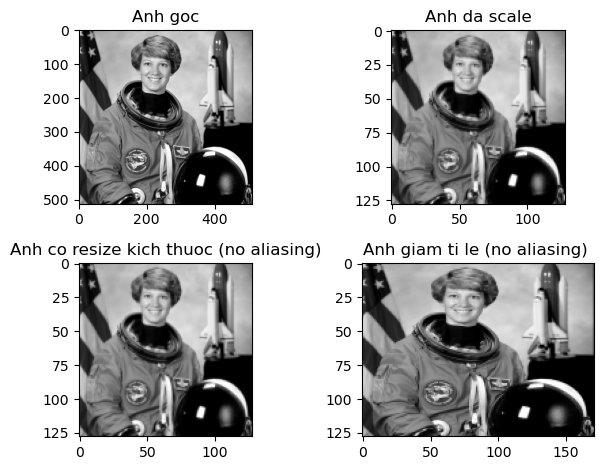

In [12]:
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
image = color.rgb2gray(data.astronaut())
image_rescaled = rescale(image, 1.0 / 4.0)
image_resized = resize(image, (image.shape[0] / 4, image.shape[1] / 4))
image_downscaled = downscale_local_mean(image, (4, 3))
fig, axes = plt.subplots(nrows=2, ncols=2)
ax = axes.ravel()
ax[0].imshow(image, cmap='gray') # the hien mau xam
ax[0].set_title("Anh goc")
ax[1].imshow(image_rescaled, cmap='gray') # the hien mau xam
ax[1].set_title("Anh da scale")
ax[2].imshow(image_resized, cmap='gray') # the hien mau xam
ax[2].set_title("Anh co resize kich thuoc (no aliasing)")
ax[3].imshow(image_downscaled, cmap='gray') # the hien mau xam
ax[3].set_title("Anh giam ti le (no aliasing) ")
ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()

In [ ]:
# BÀI TẬP CHƯƠNG 7
# Câu 1:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
def apply_gaussian_blur(image_array, kernel):
    """
    Áp dụng bộ lọc Gaussian blur cho ảnh grayscale
    
    Args:
        image_array: Mảng numpy 2D chứa ảnh grayscale
        kernel: Ma trận kernel Gaussian (phải là số lẻ x số lẻ)
    
    Returns:
        Ảnh đã được làm mờ (numpy array)
    """
    # Lấy kích thước ảnh và kernel
    img_h, img_w = image_array.shape
    kernel_h, kernel_w = kernel.shape
    
    # Tính padding để giữ nguyên kích thước ảnh
    pad_h = kernel_h // 2
    pad_w = kernel_w // 2
    
    # Thêm padding cho ảnh (reflection padding để tránh edge artifacts)
    padded_img = np.pad(image_array, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')
    # Khởi tạo ảnh kết quả
    result = np.zeros_like(image_array, dtype=np.float64)
    # Áp dụng convolution
    for i in range(img_h):
        for j in range(img_w):
            # Trích xuất vùng ảnh tương ứng với kernel
            region = padded_img[i:i+kernel_h, j:j+kernel_w]
            # Tính tích chập (convolution)
            result[i, j] = np.sum(region * kernel)
    # Đảm bảo giá trị pixel trong khoảng [0, 255]
    result = np.clip(result, 0, 255)
    return result.astype(np.uint8)
def create_gaussian_kernel():
    """
    Tạo ma trận kernel Gaussian 7x7 theo yêu cầu
    Kernel được chuẩn hóa để tổng các phần tử = 1
    """
    kernel = np.array([
        [1,  4,  6,  4,  1],
        [4, 16, 24, 16,  4],
        [6, 24, 36, 24,  6],
        [4, 16, 24, 16,  4],
        [1,  4,  6,  4,  1]
    ], dtype=np.float64)
    # Chuẩn hóa kernel (tổng = 1) để bảo toàn độ sáng
    kernel = kernel / np.sum(kernel)
    return kernel
def process_image(image_path):
    """
    Xử lý ảnh: đọc, chuyển grayscale, áp dụng blur, hiển thị kết quả
    """
    try:
        # Đọc ảnh
        img = Image.open(image_path)
        # Chuyển sang grayscale nếu cần
        if img.mode != 'L':
            img = img.convert('L')
        # Chuyển sang numpy array
        img_array = np.array(img, dtype=np.float64)
        # Tạo Gaussian kernel
        gaussian_kernel = create_gaussian_kernel()
        # Áp dụng Gaussian blur
        blurred_img = apply_gaussian_blur(img_array, gaussian_kernel)
        # Hiển thị kết quả
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img_array, cmap='gray')
        plt.title('Ảnh gốc')
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(blurred_img, cmap='gray')
        plt.title('Ảnh sau khi làm mờ Gaussian')
        plt.axis('off')   
        plt.tight_layout()
        plt.show()    
        return img_array, blurred_img       
    except Exception as e:
        print(f"Lỗi khi xử lý ảnh: {e}")
        return None, None
# Tạo ảnh mẫu để test (nếu không có ảnh thật)
def create_test_image():
    """
    Tạo ảnh test với các hình dạng đơn giản
    """
    img = np.zeros((200, 200), dtype=np.uint8)
    # Thêm hình chữ nhật
    img[50:100, 50:100] = 255
    # Thêm hình tròn
    center_x, center_y = 150, 150
    radius = 30
    y, x = np.ogrid[:200, :200]
    mask = (x - center_x)**2 + (y - center_y)**2 <= radius**2
    img[mask] = 128
    return img
if __name__ == "__main__":
    # Tạo kernel Gaussian
    kernel = create_gaussian_kernel()
    print("Gaussian Kernel (5x5):")
    print(kernel)
    print(f"Tổng các phần tử kernel: {np.sum(kernel):.6f}")
    test_img = create_test_image()
    blurred_test = apply_gaussian_blur(test_img, kernel)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(test_img, cmap='gray')
    plt.title('Ảnh test gốc')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(blurred_test, cmap='gray')
    plt.title('Ảnh sau khi làm mờ Gaussian')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    original, blurred = process_image("D:/download.png")

In [ ]:
# Câu 2:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
def apply_edge_detection(image_array, kernel):
    """
    Áp dụng bộ lọc edge detection cho ảnh grayscale
    
    Args:
        image_array: Mảng numpy 2D chứa ảnh grayscale
        kernel: Ma trận kernel edge detection (3x3)
    
    Returns:
        Ảnh đã được detect edge (numpy array)
    """
    img_h, img_w = image_array.shape
    kernel_h, kernel_w = kernel.shape
    # Tính padding
    pad_h = kernel_h // 2
    pad_w = kernel_w // 2
    # Thêm padding (zero padding cho edge detection)
    padded_img = np.pad(image_array, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    # Khởi tạo ảnh kết quả
    result = np.zeros_like(image_array, dtype=np.float64)
    # Áp dụng convolution
    for i in range(img_h):
        for j in range(img_w):
            # Trích xuất vùng ảnh tương ứng với kernel
            region = padded_img[i:i+kernel_h, j:j+kernel_w]
            # Tính tích chập
            result[i, j] = np.sum(region * kernel)
    # Xử lý giá trị âm bằng absolute value và normalize
    result = np.abs(result)
    result = np.clip(result, 0, 255)
    return result.astype(np.uint8)
def create_edge_kernels():
    """
    Tạo các ma trận kernel edge detection theo yêu cầu
    """
    # Kernel a: Laplacian-like filter
    kernel_a = np.array([
        [ 0, -1,  0],
        [-1,  4, -1],
        [ 0, -1,  0]
    ], dtype=np.float64)
    # Kernel b: Enhanced edge detection filter
    kernel_b = np.array([
        [-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]
    ], dtype=np.float64)
    return kernel_a, kernel_b
def apply_combined_edge_detection(image_array, kernel_a, kernel_b):
    """
    Áp dụng cả hai kernel và kết hợp kết quả
    
    Args:
        image_array: Ảnh đầu vào
        kernel_a: Ma trận kernel thứ nhất
        kernel_b: Ma trận kernel thứ hai
    
    Returns:
        Tuple (edge_a, edge_b, combined) - kết quả từ từng kernel và kết hợp
    """
    # Áp dụng từng kernel
    edge_a = apply_edge_detection(image_array, kernel_a)
    edge_b = apply_edge_detection(image_array, kernel_b)
    # Kết hợp hai kết quả (weighted average)
    combined = (0.5 * edge_a + 0.5 * edge_b).astype(np.uint8)
    return edge_a, edge_b, combined
def enhance_edges(edge_image, threshold=50):
    """
    Tăng cường độ tương phản của các cạnh
    
    Args:
        edge_image: Ảnh edge detection
        threshold: Ngưỡng để tăng cường (0-255)
    
    Returns:
        Ảnh đã được tăng cường cạnh
    """
    enhanced = edge_image.copy()
    # Áp dụng threshold để làm nổi bật cạnh
    enhanced[enhanced < threshold] = 0
    enhanced[enhanced >= threshold] = 255
    return enhanced
def process_image_edges(image_path):
    """
    Xử lý ảnh: đọc, chuyển grayscale, detect edges, hiển thị kết quả
    """
    try:
        # Đọc ảnh
        img = Image.open(image_path)
        # Chuyển sang grayscale
        if img.mode != 'L':
            img = img.convert('L')
        # Chuyển sang numpy array
        img_array = np.array(img, dtype=np.float64)
        # Tạo edge kernels
        kernel_a, kernel_b = create_edge_kernels()
        # Áp dụng edge detection
        edge_a, edge_b, combined = apply_combined_edge_detection(img_array, kernel_a, kernel_b)
        # Tăng cường cạnh
        enhanced_a = enhance_edges(edge_a)
        enhanced_b = enhance_edges(edge_b)
        # Hiển thị kết quả
        plt.figure(figsize=(15, 10))
        # Ảnh gốc
        plt.subplot(2, 3, 1)
        plt.imshow(img_array, cmap='gray')
        plt.title('Ảnh gốc')
        plt.axis('off')
        # Edge detection kernel A
        plt.subplot(2, 3, 2)
        plt.imshow(edge_a, cmap='gray')
        plt.title('Edge Detection - Kernel A\n(Laplacian-like)')
        plt.axis('off')
        # Edge detection kernel B
        plt.subplot(2, 3, 3)
        plt.imshow(edge_b, cmap='gray')
        plt.title('Edge Detection - Kernel B\n(8-connected)')
        plt.axis('off')
        # Combined result
        plt.subplot(2, 3, 4)
        plt.imshow(combined, cmap='gray')
        plt.title('Kết hợp hai kernel')
        plt.axis('off')
        # Enhanced edges A
        plt.subplot(2, 3, 5)
        plt.imshow(enhanced_a, cmap='gray')
        plt.title('Kernel A - Tăng cường')
        plt.axis('off')
        # Enhanced edges B
        plt.subplot(2, 3, 6)
        plt.imshow(enhanced_b, cmap='gray')
        plt.title('Kernel B - Tăng cường')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        return img_array, edge_a, edge_b, combined 
    except Exception as e:
        print(f"Lỗi khi xử lý ảnh: {e}")
        return None, None, None, None
def create_test_image():
    """
    Tạo ảnh test với các hình dạng có cạnh rõ ràng
    """
    img = np.zeros((200, 200), dtype=np.uint8)
    # Thêm hình chữ nhật
    img[50:100, 50:100] = 255
    # Thêm hình tròn
    center_x, center_y = 150, 150
    radius = 25
    y, x = np.ogrid[:200, :200]
    mask = (x - center_x)**2 + (y - center_y)**2 <= radius**2
    img[mask] = 128
    # Thêm đường thẳng
    img[120:125, 20:180] = 200
    # Thêm tam giác
    for i in range(30):
        img[150+i, 30:30+i] = 180
    return img
def compare_kernels():
    """
    So sánh hiệu quả của hai kernel trên ảnh test
    """
    # Tạo ảnh test
    test_img = create_test_image()
    # Tạo kernels
    kernel_a, kernel_b = create_edge_kernels()
    print("Kernel A (Laplacian-like):")
    print(kernel_a)
    print("\nKernel B (8-connected):")
    print(kernel_b)
    # Áp dụng edge detection
    edge_a, edge_b, combined = apply_combined_edge_detection(test_img, kernel_a, kernel_b)
    # Hiển thị kết quả
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 3, 1)
    plt.imshow(test_img, cmap='gray')
    plt.title('Ảnh test gốc')
    plt.axis('off')
    plt.subplot(2, 3, 2)
    plt.imshow(edge_a, cmap='gray')
    plt.title('Kernel A - Laplacian-like\n(Phát hiện cạnh cross-shaped)')
    plt.axis('off')
    plt.subplot(2, 3, 3)
    plt.imshow(edge_b, cmap='gray')
    plt.title('Kernel B - 8-connected\n(Phát hiện cạnh toàn hướng)')
    plt.axis('off')
    plt.subplot(2, 3, 4)
    plt.imshow(combined, cmap='gray')
    plt.title('Kết hợp hai kernel')
    plt.axis('off')
    plt.subplot(2, 3, 5)
    plt.imshow(enhance_edges(edge_a), cmap='gray')
    plt.title('Kernel A - Tăng cường')
    plt.axis('off')
    plt.subplot(2, 3, 6)
    plt.imshow(enhance_edges(edge_b), cmap='gray')
    plt.title('Kernel B - Tăng cường')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
if __name__ == "__main__":
    print("=== EDGE DETECTION FILTER DEMO ===")
    compare_kernels()
    original, edge_a, edge_b, combined = process_image_edges("D:/download.png")